In [ ]:
! rm *.c *.o *.so

# Examen Parcial

Indicaciones generales:

* En lo que respecta a `C` no deberá usar punteros, ni arreglos. Tampoco se deberá emplear administración de memoria dinámica, ni de funciones auxiliares de ninguna librería.

* Los puntajes de ítems relacionados con mediciones de tiempo, error relativo y presentación de gráficos solo serán asignados en caso sus funciones estén correctamente implementadas.

* Las funciones implementadas solo deberán tener los argumentos mencionados en su respectivo ítem.

* Los resultados de la función `_slow_` serán las referencias para medir los speedups.

* No se puede emplear ChatGPT, ni ningún modelo de lenguaje.

* Puede emplear apuntes, clases y hacer consultas en foros de internet.

El arco tangente de un número `x` se calcula con la siguiente serie:

$$
arctan(x) = x - \frac{x^{3}}{3} + \frac{x^{5}}{5} - \frac{x^{7}}{7} + \frac{x^{9}}{9} - \cdots
$$

Durante el examen se le solicitará implementar una grupo de funciones basados en esta serie

1. Implementar una función en `python` que calcule el arcotangente de un ángulo `x`. (1.0)

Nombre: `py_arctan_slow`

Argumentos:
* `x` : número
* `n_terms`: cantidad de términos

Resultado: `arctan(x)`

Observación: No debe emplear funciones de módulos auxiliares, ni suyas propias. Todo se debe hacer dentro de la función.

In [ ]:
def py_arctan_slow(x, n_terms):
    # Inicializar arctan con el valor de x
    arctan = x
    # Calcular términos adicionales de la serie de arctan
    for n in range(n_terms):
        # Agregar el término actual a arctan
        arctan += ((-1)**(n+1)) * (x**(2*(n+1)+1) / (2*(n+1)+1))
    # Retornar el valor aproximado de arctan
    return arctan


2. Implementar una función en `python` que calcule el arcotangente de un ángulo `x`. (2.0)

Nombre: `py_arctan_fast`

Argumentos:
* `x` : número
* `n_terms`: cantidad de términos

Resultado: `arctan(x)`

Observación: No debe emplear funciones de módulos auxiliares, ni suyas propias. Se le sugiere deducir el término $t_{n}$ en función del término $t_{n-1}$

In [ ]:
def py_arctan_fast(x, n_terms):
    # Inicializar tn y t0 con el valor de x
    tn = x
    t0 = x
    # Calcular términos adicionales de la serie de arctan de forma más eficiente
    for n in range(n_terms):
        # Calcular el siguiente término tn usando el término anterior t0
        tn = tn + ((-1)**(n+1)) * t0 * (x*x / ((2*n)+3))
        # Actualizar t0 para el siguiente término
        t0 = t0 * x*x
    # Retornar el valor aproximado de arctan
    return tn


In [ ]:
#Pruebas al vuelo de las funciones en python
x = 0.5
n_terms = 7

res_slow = py_arctan_slow(x,n_terms)
res_fast = py_arctan_fast(x,n_terms)

print(res_slow)
print(res_fast)

0.46364724210793534
0.46364724210793534


3. En una celda mágica implementar dos versiones en `C` para la función `py_arctan_fast`. Una versión será para ángulos de tipo `double` y otra versión será para ángulos de tipo `long double`. (3.0)

In [ ]:
%%file c_arctan.c

// Aproximación del arco tangente de x utilizando una serie de Taylor con n_terms términos
double c_arctan_double(double x, int n_terms){
    // Inicializar tn y t0 con el valor de x
    double tn=x, t0=x;
    // Calcular términos adicionales de la serie de arctan de forma más eficiente
    for(int n=0; n<n_terms; n++){
        // Calcular el siguiente término tn usando el término anterior t0
        tn = tn + ((-1)*(n/2==0) + 1*(n/2!=0))* t0 * (x*x/((2*n)+3));
        // Actualizar t0 para el siguiente término
        t0 = t0*x*x;
    }
    // Retornar el valor aproximado de arctan
    return tn;
}

// Aproximación del arco tangente de x utilizando una serie de Taylor con n_terms términos
long double c_arctan_longdouble(long double x, int n_terms){
    // Inicializar tn y t0 con el valor de x
    long double tn=x, t0=x;
    // Calcular términos adicionales de la serie de arctan de forma más eficiente
    for(int n=0; n<n_terms; n++){
        // Calcular el siguiente término tn usando el término anterior t0
        tn = tn + ((-1)*(n/2==0) + 1*(n/2!=0))* t0 * (x*x/((2*n)+3));
        // Actualizar t0 para el siguiente término
        t0 = t0*x*x;
    }
    // Retornar el valor aproximado de arctan
    return tn;
}


Writing c_arctan.c


4. Crear el *object file* y la *shared library* (0.25)

In [ ]:
! gcc -c c_arctan.c -o c_arctan.o

In [ ]:
! gcc -shared c_arctan.o -o c_arctan.so

5. Hacer el enlace con python mediante `ctypes` (0.25)

In [ ]:
import ctypes

In [ ]:
import ctypes

def ctypes_c_arctan():
    # Indicar la ruta de la shared library
    libfile = './c_arctan.so'

    # Cargar la shared library
    libreria = ctypes.CDLL(libfile)

    # Configurar los argumentos y el tipo de retorno para c_arctan_double
    libreria.c_arctan_double.argtypes = [ctypes.c_double, ctypes.c_int]
    libreria.c_arctan_double.restype = ctypes.c_double

    # Configurar los argumentos y el tipo de retorno para c_arctan_longdouble
    libreria.c_arctan_longdouble.argtypes = [ctypes.c_longdouble, ctypes.c_int]
    libreria.c_arctan_longdouble.restype = ctypes.c_longdouble

    # Devolver las funciones configuradas
    return libreria.c_arctan_double, libreria.c_arctan_longdouble


6. Hacer una instancia de las dos funciones en C llamando a la función del ítem 5 (0.25)

In [ ]:
c_arctan_double, c_arctan_longdouble = ctypes_c_arctan()

In [ ]:
#Pruebas al vuelo de las funciones en c
x = 0.5
n_terms = 7

res_double = c_arctan_double(x,n_terms)
res_long = c_arctan_longdouble(x,n_terms)

print(res_double)
print(res_long)

0.45347223238458595
0.4534722323845859


7. Presentar una gráfica para las cuatro funciones empleando solo 1 término. Reemplace sus funciones donde se indica. (0.25)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Crear un arreglo de 1000 puntos equidistantes en el rango de -1.00 a 1.00
xs = np.linspace(-1.00, 1.00, 1000)

In [ ]:
# Calcular el arco tangente para cada valor en xs utilizando diferentes métodos
# py_arctan_slow y py_arctan_fast son funciones en Python
# c_arctan_double y c_arctan_longdouble son funciones en C
# El segundo argumento (n_terms) indica la cantidad de términos en la serie de Taylor
yslow = np.asarray([py_arctan_slow(x, 1) for x in xs])  # Método lento en Python
yfast = np.asarray([py_arctan_fast(x, 1) for x in xs])  # Método rápido en Python
yfast_cd = np.asarray([c_arctan_double(x, 1) for x in xs])  # Método rápido en C con double
yfast_cld = np.asarray([c_arctan_longdouble(x, 1) for x in xs])  # Método rápido en C con long double

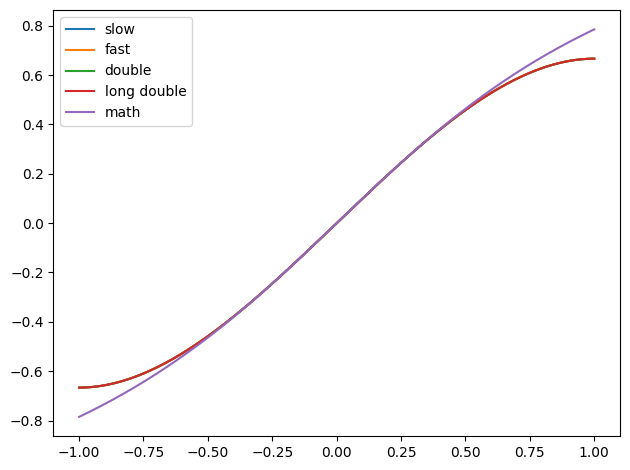

In [ ]:
# Graficar los resultados de los diferentes métodos de cálculo del arco tangente
plt.plot(xs, yslow, label='slow')          # Método lento en Python
plt.plot(xs, yfast, label='fast')          # Método rápido en Python
plt.plot(xs, yfast_cd, label='double')     # Método rápido en C con double
plt.plot(xs, yfast_cld, label='long double')  # Método rápido en C con long double
plt.plot(xs, np.arctan(xs), label='math')  # Arco tangente calculado por la función arctan de NumPy
plt.legend()  # Mostrar leyenda
plt.tight_layout()  # Ajustar diseño de la gráfica


8. Implementar una función en `python` que calcula el error relativo de una función `f` sobre un grupo de números `xs` con `n_terms` términos (1.0)

In [ ]:
def error_relativo(f, xs, n_terms):
    # Calcular el valor aproximado de f(x) para cada x en xs
    vector_calc = []
    for x in xs:
        vector_calc.append(f(x, n_terms))

    # Calcular el error relativo entre los valores aproximados y los valores reales de arctan(x)
    error_rel = abs(np.linalg.norm(np.asarray(vector_calc) - np.arctan(xs))) / abs(np.linalg.norm(np.arctan(xs)))

    # Retornar el error relativo
    return error_rel

9. Presentar una gráfica del error relativo para las cuatro funciones. Reemplace sus funciones donde se indica. (0.25)

In [ ]:
N = 200  # Número máximo de términos en la serie de Taylor

# Calcular el error relativo para cada método y cada cantidad de términos en la serie de Taylor
# Utilizando un rango de 10 a N con incrementos de 10
err_slow = [error_relativo(py_arctan_slow, xs, n) for n in range(10, N, 10)]  # Método lento en Python
err_fast = [error_relativo(py_arctan_fast, xs, n) for n in range(10, N, 10)]  # Método rápido en Python
err_cd = [error_relativo(c_arctan_double, xs, n) for n in range(10, N, 10)]  # Método rápido en C con double
err_cld = [error_relativo(c_arctan_longdouble, xs, n) for n in range(10, N, 10)]  # Método rápido en C con long double

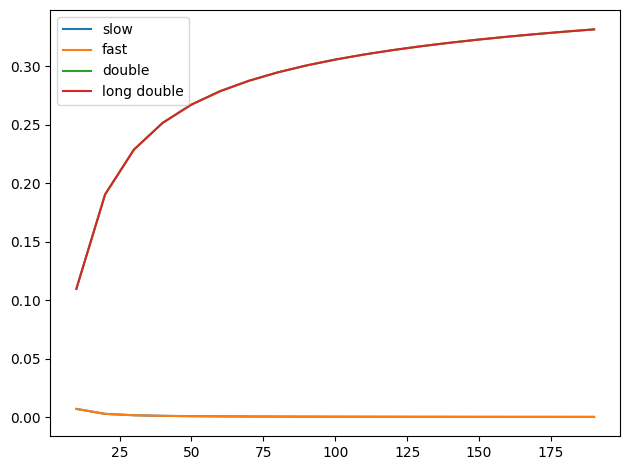

In [ ]:
# Graficar el error relativo para cada método en función de la cantidad de términos en la serie de Taylor
plt.plot(range(10, N, 10), err_slow, label='slow')      # Método lento en Python
plt.plot(range(10, N, 10), err_fast, label='fast')      # Método rápido en Python
plt.plot(range(10, N, 10), err_cd, label='double')      # Método rápido en C con double
plt.plot(range(10, N, 10), err_cld, label='long double')  # Método rápido en C con long double
plt.legend()  # Mostrar leyenda
plt.tight_layout()  # Ajustar diseño de la gráfica


10. Realice la medición de tiempo con sus funciones (1.0)

In [ ]:
def arctan(f, n_terms, xs):
    return np.asarray([f(x, n_terms) for x in xs])

In [ ]:
import time
import statistics

In [ ]:
# Inicializar listas para almacenar los tiempos de ejecución medianos
t_py_slow = []         # Tiempos de ejecución medianos para py_arctan_slow
t_py_fast = []         # Tiempos de ejecución medianos para py_arctan_fast
t_c_double = []        # Tiempos de ejecución medianos para c_arctan_double
t_c_longdouble = []    # Tiempos de ejecución medianos para c_arctan_longdouble

# Crear un arreglo de 1000 puntos equidistantes en el rango de -1.00 a 1.00
xs = np.linspace(-1.00, 1.00, 1000)

# Generar una secuencia de números de 10 a N con incrementos de 10
Ns = range(10, N, 10)

# Iterar sobre los diferentes números de términos en la serie de Taylor
for n in Ns:

    # Listas para almacenar los tiempos de ejecución individuales
    t_py_slowi = []
    t_py_fasti = []
    t_c_doublei = []
    t_c_longdoublei = []

    # Realizar 20 ejecuciones para cada método
    for _ in range(20):

        # Calcular el tiempo de ejecución para py_arctan_slow
        tic = time.perf_counter()
        arctan(py_arctan_slow, n, xs)
        toc = time.perf_counter()
        t_py_slowi.append(toc - tic)

        # Calcular el tiempo de ejecución para py_arctan_fast
        tic = time.perf_counter()
        arctan(py_arctan_fast, n, xs)
        toc = time.perf_counter()
        t_py_fasti.append(toc - tic)

        # Calcular el tiempo de ejecución para c_arctan_double
        tic = time.perf_counter()
        arctan(c_arctan_double, n, xs)
        toc = time.perf_counter()
        t_c_doublei.append(toc - tic)

        # Calcular el tiempo de ejecución para c_arctan_longdouble
        tic = time.perf_counter()
        arctan(c_arctan_longdouble, n, xs)
        toc = time.perf_counter()
        t_c_longdoublei.append(toc - tic)

    # Calcular la mediana de los tiempos de ejecución y agregarlos a las listas principales
    t_py_slow.append(statistics.median(t_py_slowi))
    t_py_fast.append(statistics.median(t_py_fasti))
    t_c_double.append(statistics.median(t_c_doublei))
    t_c_longdouble.append(statistics.median(t_c_longdoublei))


11. Presentar la gráfica de tiempos para los cuatro casos (0.25)

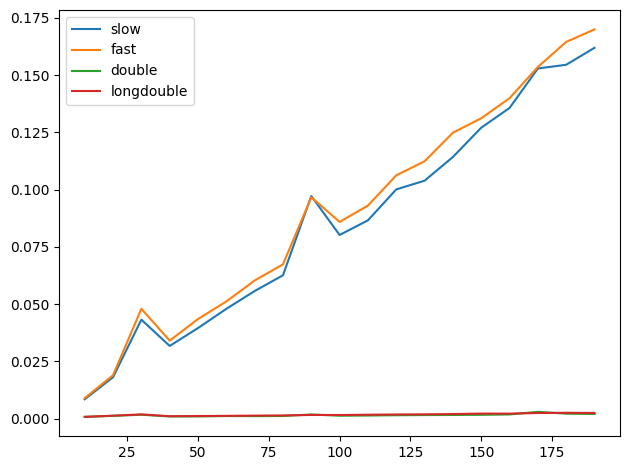

In [ ]:
plt.plot(Ns, t_py_slow, label='slow')
plt.plot(Ns, t_py_fast, label='fast')
plt.plot(Ns, t_c_double, label='double')
plt.plot(Ns, t_c_longdouble, label='longdouble')
plt.legend()
plt.tight_layout()

12. Presentar la gráfica de speedup de `python fast` respecto de `python slow` (0.25)

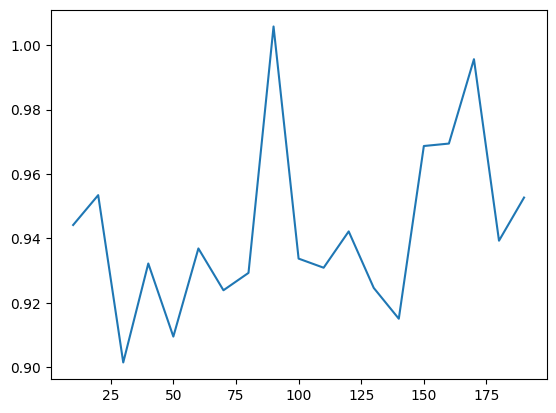

In [ ]:
plt.plot(Ns, np.asarray(t_py_slow) / np.asarray(t_py_fast), label='fast')

13. Presentar la gráfica de speedup de `c double` y `c long double` respecto de `python slow` (0.25)

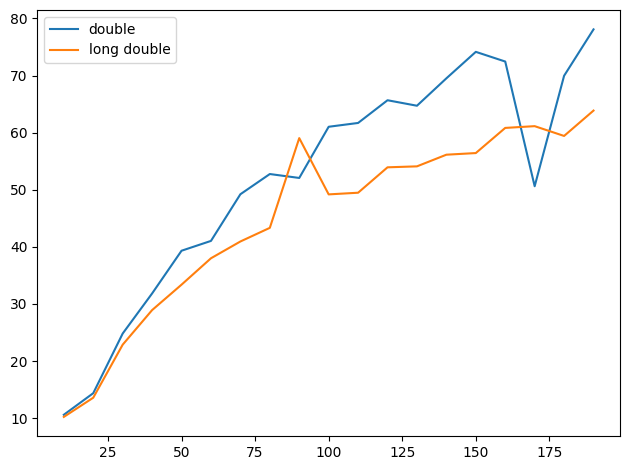

In [ ]:
plt.plot(Ns, np.asarray(t_py_slow) / np.asarray(t_c_double), label='double')
plt.plot(Ns, np.asarray(t_py_slow) / np.asarray(t_c_longdouble), label='long double')
plt.legend()
plt.tight_layout()